In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [2]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]

#### Data Cleaning
* replaced "-" with NaN
* convert numberical columns into float
* get the minimum non 0 value of __First QNB, Second QNB, and Third QNB__
* for replace NaN values with 0, for rows with 9 columns with NaN values
* replace the rest of NaN in __First QNB, Second QNB, and Third QNB__ with minimum value of column minus 1

* __NB Lodged and TB Lodged__ - replaced NaN with 0 and s with minim value of column divided by 2. Due to s means really small value
* remove "%" in __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* convert numerical columns to int except for __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* add __Mean QNB__ column, which is the average of First QNB, Second QNB, and Third QNB.

In [3]:
rent_df = rent_df.replace("-", np.nan)

In [4]:
rent_df["First QNB"] = rent_df["First QNB"].astype(str).astype(float)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(str).astype(float)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(str).astype(float)

In [5]:
### NAN values are replaced with min-1 ###

f_min_val = np.min(rent_df["First QNB"]) - 1
s_min_val = np.min(rent_df["Second QNB"]) - 1
t_min_val = np.min(rent_df["Third QNB"]) - 1

In [6]:
null = []
for x in rent_df.index:#range(len(rent_df.index)):
    null_row = rent_df.loc[x].isnull().sum()
    if null_row == 9:
        null.append(x)
        rent_df.loc[x] = rent_df.loc[x].replace(np.nan, 0)

In [7]:
### NAN values are replaced with min-1 ###

rent_df["First QNB"] = rent_df["First QNB"].replace(np.nan, f_min_val)
rent_df["Second QNB"] = rent_df["Second QNB"].replace(np.nan, s_min_val)
rent_df["Third QNB"] = rent_df["Third QNB"].replace(np.nan, t_min_val)

In [8]:
### replace s  with 1 ###
rent_df = rent_df.replace("s", 1)
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(str).astype(float)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(str).astype(float)

In [9]:
### NAN values are replaced with 0 ###
### s values which mean really small values are replaced with min/2 ###

fq_min_val = np.min(rent_df["NB Lodged"])
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(1, fq_min_val)/2
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(np.nan, 0)

sq_min_val = np.min(rent_df["TB Lodged"])
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(1, sq_min_val)/2
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(np.nan, 0)

In [10]:
### float to int ###
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(int)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(int)

rent_df["First QNB"] = rent_df["First QNB"].astype(int)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(int)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(int)

In [11]:
### remove % sign ###
rent_df['Qtrly Median Change'] = rent_df['Qtrly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly Median Change'] = rent_df['Annly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Qtrly NB'] = rent_df['Qtrly NB'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly NB'] = rent_df['Annly NB'].astype(str).str.extract('(\d+)').astype(float)

### replace nan values for the last 4 columns with 0 ###
rent_df = rent_df.replace(np.nan, 0)

In [12]:
price_df = rent_df[['LGA', 'Dwelling Type', 'Bedroom Number', 'First QNB', 'Second QNB', 'Third QNB']].copy()
price_df['mean'] = price_df.mean(axis=1)

In [13]:
rent_df['Mean QNB'] = np.nan
rent_df['Mean QNB'] = price_df['mean']
rent_df['Mean QNB'] = rent_df['Mean QNB'].astype(int)

#### Top LGAs with highest Rent price

In [14]:
### remove Total column from LGA, and get unique LGA values ###
sort_df = rent_df[rent_df['LGA']!='Total']
top_mean = sort_df.sort_values(by="Mean QNB", ascending = False)['LGA'].unique()[:10]
top_mean_arr = []

In [15]:
### Get the Mean QNB per quarter and year of top LGA for graphing ###
for x in range(len(top_mean)):
    name = top_mean[x]
    top_mean_df = rent_df[rent_df['LGA']==top_mean[x]].sort_values(by="Mean QNB", ascending = False)
    top_mean_df = top_mean_df[top_mean_df['Dwelling Type'] == 'Total']
    top_mean_df = top_mean_df[top_mean_df['Bedroom Number'] == 'Total']
    top_mean_df = top_mean_df.sort_values(by=['Year', 'Quarter']) 
    top_mean_df = top_mean_df.reset_index()
    for y in top_mean_df.index:
        if y == 0:
            Q1_15 = top_mean_df['Mean QNB'].loc[y]
        if y == 1:
            Q2_15 = top_mean_df['Mean QNB'].loc[y]
        if y == 2:
            Q3_15 = top_mean_df['Mean QNB'].loc[y]
        if y == 3:
            Q4_15 = top_mean_df['Mean QNB'].loc[y]
        if y == 4:
            Q1_16 = top_mean_df['Mean QNB'].loc[y]
        if y == 5:
            Q2_16 = top_mean_df['Mean QNB'].loc[y]
        if y == 6:
            Q3_16 = top_mean_df['Mean QNB'].loc[y]
        if y == 7:
            Q4_16 = top_mean_df['Mean QNB'].loc[y]
        if y == 8:
            Q1_17 = top_mean_df['Mean QNB'].loc[y]
        if y == 9:
            Q2_17 = top_mean_df['Mean QNB'].loc[y]
        if y == 10:
            Q3_17 = top_mean_df['Mean QNB'].loc[y]
        if y == 11:
            Q4_17 = top_mean_df['Mean QNB'].loc[y]
        if y == 12:
            Q1_18 = top_mean_df['Mean QNB'].loc[y]
        if y == 13:
            Q2_18 = top_mean_df['Mean QNB'].loc[y]
        if y == 14:
            Q3_18 = top_mean_df['Mean QNB'].loc[y]
        if y == 15:
            Q4_18 = top_mean_df['Mean QNB'].loc[y]
        if y == 16:
            Q1_19 = top_mean_df['Mean QNB'].loc[y]
        if y == 17:
            Q2_19 = top_mean_df['Mean QNB'].loc[y]
    top_mean_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

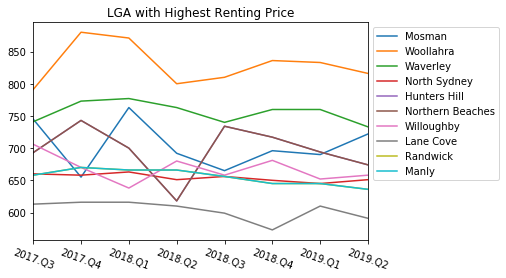

In [16]:
### Graph LGA ###
top_mean_df = pd.DataFrame.from_records(top_mean_arr)
top_mean_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
top_mean_df.index = top_mean_df['LGA']
top_mean_df = top_mean_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
top_mean_df = top_mean_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)
plt.figure(figsize=(15,10)) 
top_mean_df.transpose().plot()
plt.title('LGA with Highest Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

#### Get all LGAs and Mean QNB per year and quarter

In [17]:
LGA_list = sort_df['LGA'].unique()
all_mean_arr = []

In [18]:
for x in range(len(LGA_list)):
    name = LGA_list[x]
    all_mean_df = rent_df[rent_df['LGA']==LGA_list[x]].sort_values(by="Mean QNB", ascending = False)
    all_mean_df = all_mean_df[all_mean_df['Dwelling Type'] == 'Total']
    all_mean_df = all_mean_df[all_mean_df['Bedroom Number'] == 'Total']
    all_mean_df = all_mean_df.sort_values(by=['Year', 'Quarter']) 
    all_mean_df = all_mean_df.reset_index()
    for y in all_mean_df.index:
        if y == 0:
            Q1_15 = all_mean_df['Mean QNB'].loc[y]
        if y == 1:
            Q2_15 = all_mean_df['Mean QNB'].loc[y]
        if y == 2:
            Q3_15 = all_mean_df['Mean QNB'].loc[y]
        if y == 3:
            Q4_15 = all_mean_df['Mean QNB'].loc[y]
        if y == 4:
            Q1_16 = all_mean_df['Mean QNB'].loc[y]
        if y == 5:
            Q2_16 = all_mean_df['Mean QNB'].loc[y]
        if y == 6:
            Q3_16 = all_mean_df['Mean QNB'].loc[y]
        if y == 7:
            Q4_16 = all_mean_df['Mean QNB'].loc[y]
        if y == 8:
            Q1_17 = all_mean_df['Mean QNB'].loc[y]
        if y == 9:
            Q2_17 = all_mean_df['Mean QNB'].loc[y]
        if y == 10:
            Q3_17 = all_mean_df['Mean QNB'].loc[y]
        if y == 11:
            Q4_17 = all_mean_df['Mean QNB'].loc[y]
        if y == 12:
            Q1_18 = all_mean_df['Mean QNB'].loc[y]
        if y == 13:
            Q2_18 = all_mean_df['Mean QNB'].loc[y]
        if y == 14:
            Q3_18 = all_mean_df['Mean QNB'].loc[y]
        if y == 15:
            Q4_18 = all_mean_df['Mean QNB'].loc[y]
        if y == 16:
            Q1_19 = all_mean_df['Mean QNB'].loc[y]
        if y == 17:
            Q2_19 = all_mean_df['Mean QNB'].loc[y]
    all_mean_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

In [19]:
all_mean_df = pd.DataFrame.from_records(all_mean_arr)
all_mean_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
all_mean_df.index = all_mean_df['LGA']
#all_LGA_df = all_LGA_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
all_mean_df = all_mean_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)

#### Get correlation of all LGAs and Year/Quarter prices

In [20]:
%run scripts/PearsonValue.py

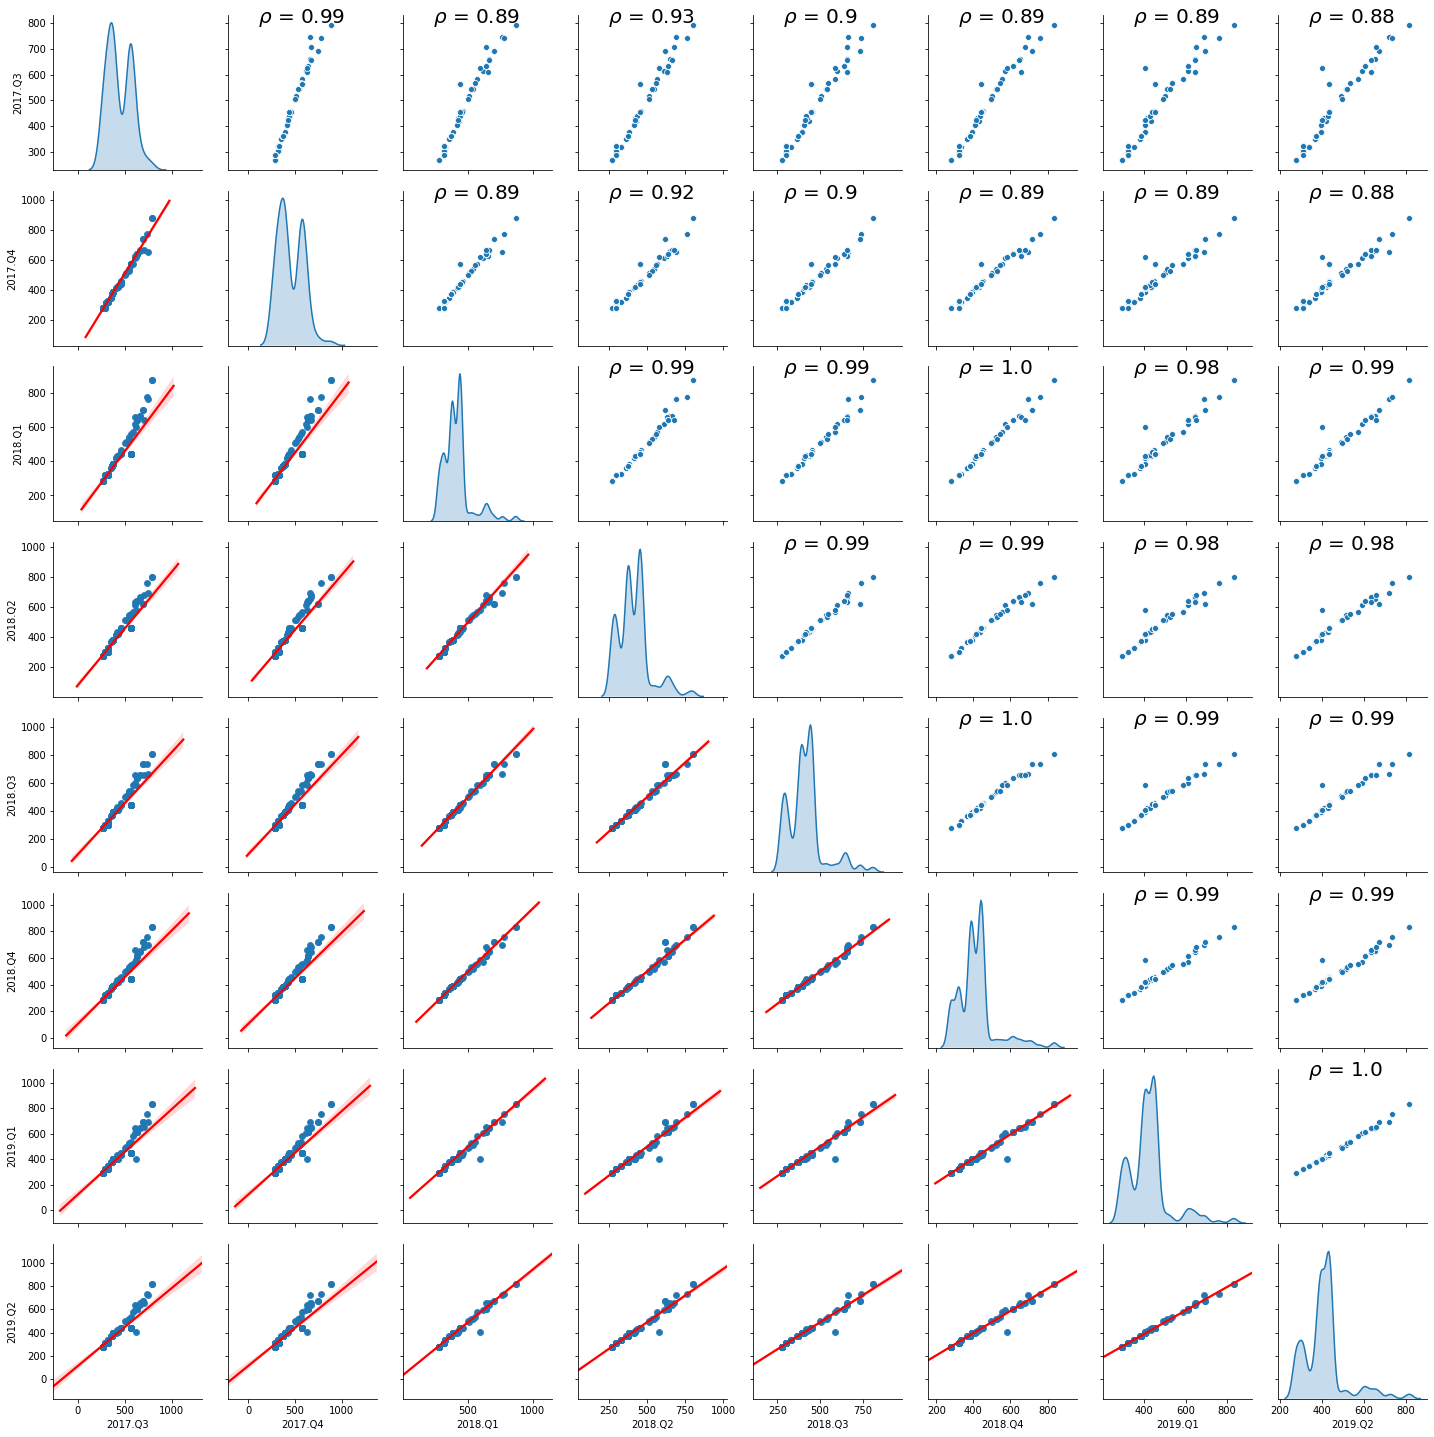

In [21]:
g = sns.pairplot(all_mean_df,
             vars = ['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Apply Models and see accruacy score
* Decision Tree
* Random Forest
* Decision Tree - entropy
* SVC

In [22]:
from sklearn.model_selection import train_test_split

cols = np.array(['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1'])
X = all_mean_df[cols]
y = all_mean_df['2019.Q2']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
### MODELS ###
model_list = [DecisionTreeClassifier(random_state=0),
              RandomForestRegressor(random_state=1),
              svm.SVC(gamma='scale'),
              MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01, 
                            solver='sgd', verbose=10,  random_state=21,tol=0.000000001)]
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

stats = []

for x in range(4):
    model = model_list[x]
    model.fit(X_train, y_train)
    predicted = model.predict(X_train)
    MSE_train = mean_squared_error(y_train, predicted)
    R2_train = r2_score(y_train, predicted)
    Accuracy_train = model.score(X_train, y_train)
    predicted = model.predict(X_test)
    MSE_test = mean_squared_error(y_test, predicted)
    R2_test = r2_score(y_test, predicted)
    Accuracy_test = model.score(X_test, y_test)
    model = model_name[x]
    stats.append((model, MSE_train, MSE_test, R2_train, R2_test, Accuracy_train, Accuracy_test))
    stats_df = pd.DataFrame.from_records(stats)
    stats_df.columns = ['Model', 'RMSE Train', 'RMSE Test', 'R-Squared Train', 'R-Squared Test', 
                        'Accuracy Score Train', 'Accuracy Score Test']
    stats_df.index = stats_df['Model']
    stats_df = stats_df.drop('Model',
                axis = 1)
stats_df

Iteration 1, loss = 134.82671874
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 20.45664048
Iteration 5, loss = 6.86626479
Iteration 6, loss = 2.83951366
Iteration 7, loss = 2.84981305
Iteration 8, loss = 2.85736337
Iteration 9, loss = 2.86248323
Iteration 10, loss = 2.86576958
Iteration 11, loss = 2.86734495
Iteration 12, loss = 2.86659652
Iteration 13, loss = 2.86647471
Iteration 14, loss = 2.86466929
Iteration 15, loss = 2.86205153
Iteration 16, loss = 2.85892640
Iteration 17, loss = 2.85575524
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,129.763636,1.000000,0.984338,1.000000,0.818182
Random Forest,44.967031,94.096364,0.995592,0.988643,0.995592,0.988643
SVM,267.359375,751.436364,0.973792,0.909306,0.843750,0.636364
Neural Network,10878.742188,8734.054545,-0.066384,-0.054152,0.343750,0.254545


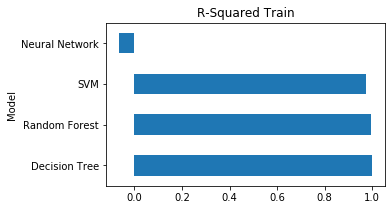

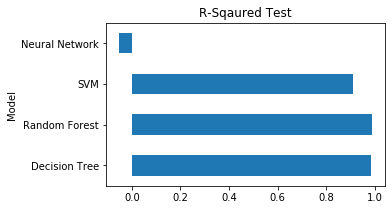

In [25]:
plt.figure(figsize=(5,3))
stats_df['R-Squared Train'].plot(kind = 'barh', 
           title='R-Squared Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['R-Squared Test'].plot(kind = 'barh', 
           title='R-Sqaured Test', 
           legend = False)

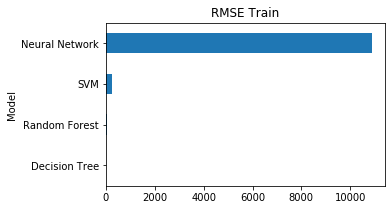

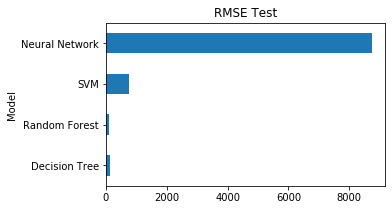

In [26]:
plt.figure(figsize=(5,3))
stats_df['RMSE Train'].plot(kind = 'barh', 
           title='RMSE Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['RMSE Test'].plot(kind = 'barh', 
           title='RMSE Test', 
           legend = False)

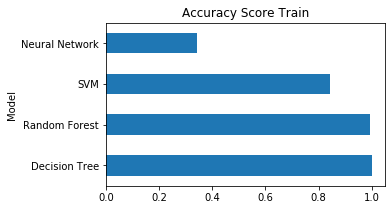

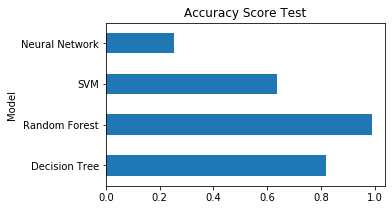

In [27]:
plt.figure(figsize=(5,3))
stats_df['Accuracy Score Train'].plot(kind = 'barh', 
           title='Accuracy Score Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['Accuracy Score Test'].plot(kind = 'barh', 
           title='Accuracy Score Test', 
           legend = False)

#### Top LGAs according to New Signed Bonds
* prove that number of signed bonds does not depend on renting price

In [28]:
### remove Total column from LGA, and get unique LGA values ###
sort_df = rent_df[rent_df['LGA']!='Total']
top_NB = sort_df.sort_values(by="NB Lodged", ascending = False)['LGA'].unique()[:10]
top_NB_arr = []

In [29]:
### Get the Mean QNB per quarter and year of top LGA for graphing ###
for x in range(len(top_NB)):
    name = top_NB[x]
    top_NB_df = rent_df[rent_df['LGA']==top_NB[x]].sort_values(by="NB Lodged", ascending = False)
    top_NB_df = top_NB_df[top_NB_df['Dwelling Type'] == 'Total']
    top_NB_df = top_NB_df[top_NB_df['Bedroom Number'] == 'Total']
    top_NB_df = top_NB_df.sort_values(by=['Year', 'Quarter']) 
    top_NB_df = top_NB_df.reset_index()
    for y in top_NB_df.index:
        if y == 0:
            Q1_15 = top_NB_df['NB Lodged'].loc[y]
        if y == 1:
            Q2_15 = top_NB_df['NB Lodged'].loc[y]
        if y == 2:
            Q3_15 = top_NB_df['NB Lodged'].loc[y]
        if y == 3:
            Q4_15 = top_NB_df['NB Lodged'].loc[y]
        if y == 4:
            Q1_16 = top_NB_df['NB Lodged'].loc[y]
        if y == 5:
            Q2_16 = top_NB_df['NB Lodged'].loc[y]
        if y == 6:
            Q3_16 = top_NB_df['NB Lodged'].loc[y]
        if y == 7:
            Q4_16 = top_NB_df['NB Lodged'].loc[y]
        if y == 8:
            Q1_17 = top_NB_df['NB Lodged'].loc[y]
        if y == 9:
            Q2_17 = top_NB_df['NB Lodged'].loc[y]
        if y == 10:
            Q3_17 = top_NB_df['NB Lodged'].loc[y]
        if y == 11:
            Q4_17 = top_NB_df['NB Lodged'].loc[y]
        if y == 12:
            Q1_18 = top_NB_df['NB Lodged'].loc[y]
        if y == 13:
            Q2_18 = top_NB_df['NB Lodged'].loc[y]
        if y == 14:
            Q3_18 = top_NB_df['NB Lodged'].loc[y]
        if y == 15:
            Q4_18 = top_NB_df['NB Lodged'].loc[y]
        if y == 16:
            Q1_19 = top_NB_df['NB Lodged'].loc[y]
        if y == 17:
            Q2_19 = top_NB_df['NB Lodged'].loc[y]
    top_NB_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

In [30]:
top_nbmean_arr=[]
### Get the Mean QNB per quarter and year of top LGA for graphing ###
for x in range(len(top_NB)):
    name = top_NB[x]
    top_nbmean_df = rent_df[rent_df['LGA']==top_mean[x]].sort_values(by="Mean QNB", ascending = False)
    top_nbmean_df = top_nbmean_df[top_nbmean_df['Dwelling Type'] == 'Total']
    top_nbmean_df = top_nbmean_df[top_nbmean_df['Bedroom Number'] == 'Total']
    top_nbmean_df = top_nbmean_df.sort_values(by=['Year', 'Quarter']) 
    top_nbmean_df = top_nbmean_df.reset_index()
    for y in top_nbmean_df.index:
        if y == 0:
            Q1_15 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 1:
            Q2_15 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 2:
            Q3_15 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 3:
            Q4_15 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 4:
            Q1_16 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 5:
            Q2_16 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 6:
            Q3_16 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 7:
            Q4_16 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 8:
            Q1_17 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 9:
            Q2_17 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 10:
            Q3_17 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 11:
            Q4_17 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 12:
            Q1_18 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 13:
            Q2_18 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 14:
            Q3_18 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 15:
            Q4_18 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 16:
            Q1_19 = top_nbmean_df['Mean QNB'].loc[y]
        if y == 17:
            Q2_19 = top_nbmean_df['Mean QNB'].loc[y]
    top_nbmean_arr.append((name, Q1_15, Q2_15, Q3_15, Q4_15, Q1_16, Q2_16, Q3_16, Q4_16, 
                    Q1_17, Q2_17, Q3_17, Q4_17, Q1_18, Q2_18, Q3_18, Q4_18,
                    Q1_19, Q2_19))

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

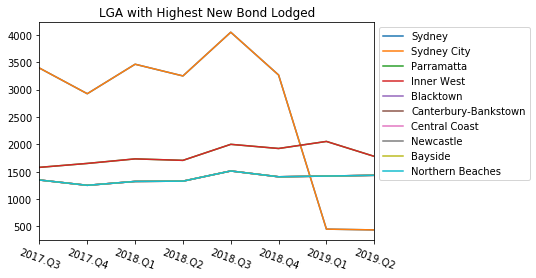

<Figure size 1080x720 with 0 Axes>

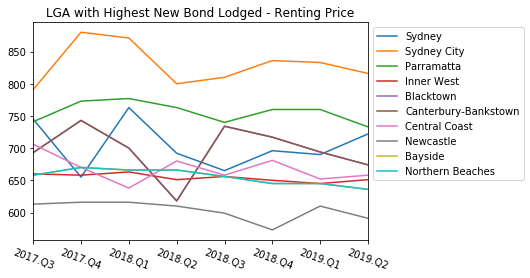

In [31]:
### Graph LGA ###
top_NB_df = pd.DataFrame.from_records(top_NB_arr)
top_NB_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
top_NB_df.index = top_NB_df['LGA']
top_NB_df = top_NB_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
top_NB_df = top_NB_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)
### MEAN ###
### Graph LGA ###
top_nbmean_df = pd.DataFrame.from_records(top_nbmean_arr)
top_nbmean_df.columns = ['LGA', '2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2', '2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2']
top_nbmean_df.index = top_nbmean_df['LGA']
top_nbmean_df = top_nbmean_df.drop('LGA', axis=1)

### remove columns for the graph to look nice ###
top_nbmean_df = top_nbmean_df.drop(['2015.Q1', '2015.Q2', '2015.Q3', '2015.Q4', '2016.Q1', '2016.Q2', '2016.Q3', '2016.Q4',
                      '2017.Q1', '2017.Q2'], axis=1)

plt.figure(figsize=(15,10)) 
top_NB_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

plt.figure(figsize=(15,10))
top_nbmean_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged - Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

In [32]:
top_NB_df

,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,
Sydney,3394,2925,3464,3250,4049,3267,450,436
Sydney City,3394,2925,3464,3250,4049,3267,450,436
Parramatta,1579,1651,1734,1707,2000,1924,2053,1780
Inner West,1579,1651,1734,1707,2000,1924,2053,1780
Blacktown,1348,1251,1322,1327,1513,1407,1420,1434
Canterbury-Bankstown,1348,1251,1322,1327,1513,1407,1420,1434
Central Coast,1348,1251,1322,1327,1513,1407,1420,1434
Newcastle,1348,1251,1322,1327,1513,1407,1420,1434
Bayside,1348,1251,1322,1327,1513,1407,1420,1434


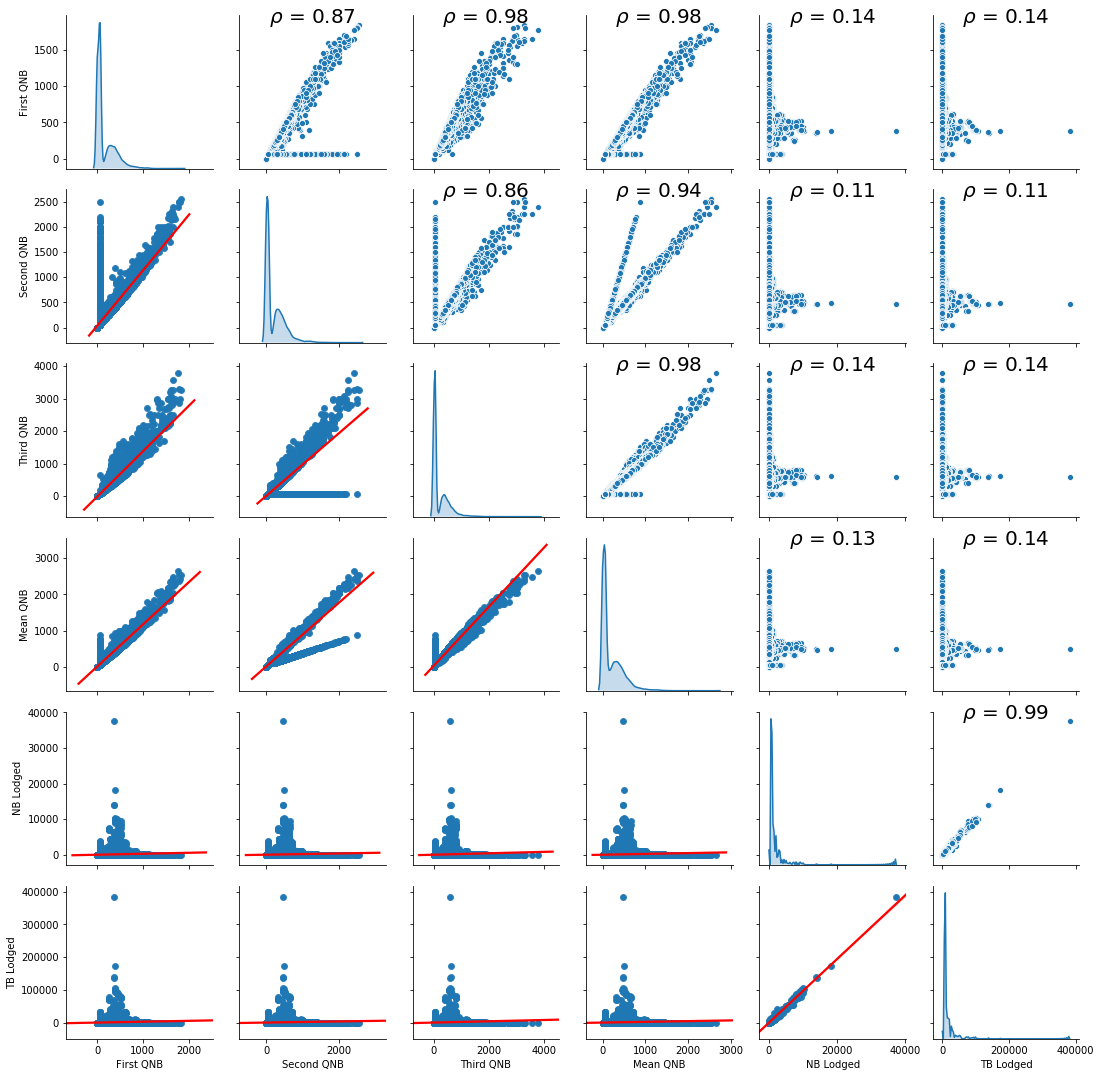

In [33]:
g = sns.pairplot(rent_df,
             vars = ['First QNB', 'Second QNB', 'Third QNB', 'Mean QNB', 'NB Lodged', 'TB Lodged'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Dwelling Type Most People Rent

In [34]:
house_df = rent_df[rent_df['Dwelling Type']=='House']
flat_df = rent_df[rent_df['Dwelling Type']=='Flat/Unit']
townhouse_df = rent_df[rent_df['Dwelling Type']=='Townhouse']

year = [2015, 2016, 2017, 2018, 2019]
bond_count_arr = []
for x in range(len(year)):
    yr = year[x]
    house = house_df[house_df['Year']==yr]['TB Lodged'].sum()
    name = 'House'
    bond_count_arr.append((yr, house, name))
    flat = flat_df[flat_df['Year']==yr]['TB Lodged'].sum()
    name = 'Flat/Unit'
    bond_count_arr.append((yr, flat, name))
    townhouse = townhouse_df[townhouse_df['Year']==yr]['TB Lodged'].sum()
    name = 'Townhouse'
    bond_count_arr.append((yr, townhouse, name))
    
bond_count_df = pd.DataFrame.from_records(bond_count_arr)
bond_count_df.columns = ['Year', 'Count', 'Dwelling Type']

Text(0.5, 1.0, 'Bond Lodged per Year')

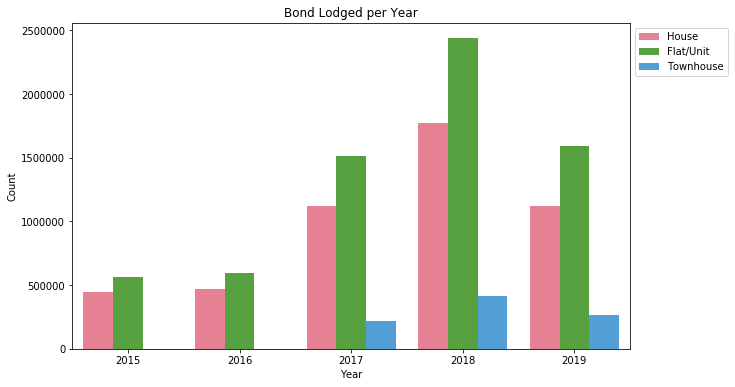

In [35]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = bond_count_df, 
            hue = 'Dwelling Type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Bond Lodged per Year')

In [36]:
BS_df = flat_df[flat_df['Bedroom Number']=='Bedsitter']
B1_df = flat_df[flat_df['Bedroom Number']=='1 Bedroom']
B2_df = flat_df[flat_df['Bedroom Number']=='2 Bedrooms']
B3_df = flat_df[flat_df['Bedroom Number']=='3 Bedrooms']
B4_df = flat_df[flat_df['Bedroom Number']=='4 or more Bedrooms']

flatbond_count_arr = []
for x in range(len(year)):
    yr = year[x]
    BS = BS_df[BS_df['Year']==yr]['TB Lodged'].sum()
    name = 'Bedsitter'
    flatbond_count_arr.append((yr, BS, name))
    B1 = B1_df[B1_df['Year']==yr]['TB Lodged'].sum()
    name = '1 Bedroom'
    flatbond_count_arr.append((yr, B1, name))
    B2 = B2_df[B2_df['Year']==yr]['TB Lodged'].sum()
    name = '2 Bedrooms'
    flatbond_count_arr.append((yr, B2, name))
    B3 = B3_df[B3_df['Year']==yr]['TB Lodged'].sum()
    name = '3 Bedrooms'
    flatbond_count_arr.append((yr, B3, name))
    B4 = B4_df[B4_df['Year']==yr]['TB Lodged'].sum()
    name = '4 or more Bedrooms'
    flatbond_count_arr.append((yr, B4, name))
    
flatbond_count_df = pd.DataFrame.from_records(flatbond_count_arr)
flatbond_count_df.columns = ['Year', 'Count', 'Number of Bedrooms']

Text(0.5, 1.0, 'Bond Lodged per Year')

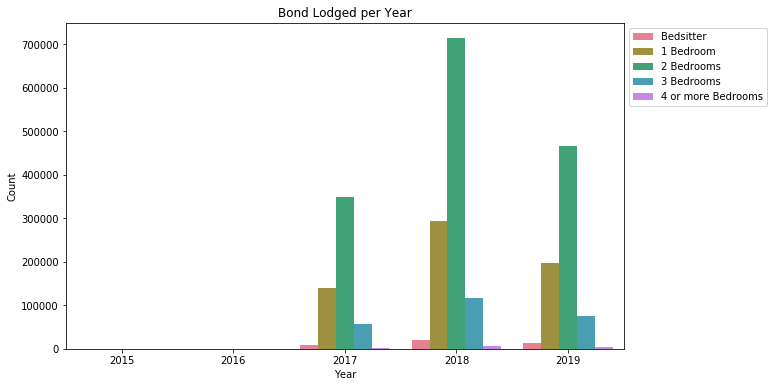

In [37]:
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = flatbond_count_df, 
            hue = 'Number of Bedrooms', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Bond Lodged per Year')

#### Apply Models and see accuracy score for rent_df
* Decision Tree
* Random Forest
* Decision Tree - Entropy
* SVC

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(rent_df['LGA'].unique())
rent_df['LGA']=le.transform(rent_df['LGA']) 

le.fit(rent_df['Dwelling Type'].unique())
rent_df['Dwelling Type']=le.transform(rent_df['Dwelling Type']) 

le.fit(['Total', 'Bedsitter', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 or more Bedrooms', 'Not Specified'])
rent_df['Bedroom Number']=le.transform(rent_df['Bedroom Number']) 

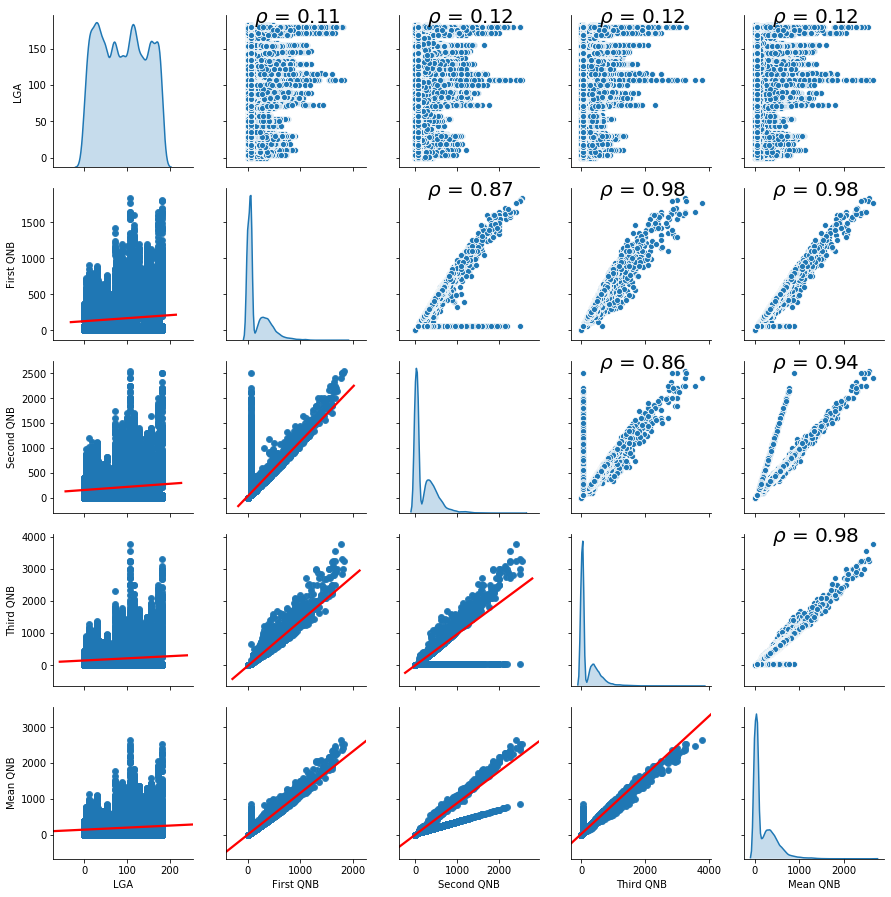

In [39]:
g = sns.pairplot(rent_df,
             vars = ['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Mean QNB'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(tree.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(tree.score(X_test, y_test)))

Accuracy in training set:  1.000
Accuracy in testing set:  0.769


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(forest_model.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(forest_model.score(X_test, y_test)))

Accuracy in training set:  1.000
Accuracy in testing set:  1.000


In [43]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

print("Accuracy in training set: {: .3f}". format(clf_entropy.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(clf_entropy.score(X_test, y_test)))

Accuracy in training set:  0.573
Accuracy in testing set:  0.580


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print("Accuracy in training set: {: .3f}". format(svc.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(svc.score(X_test, y_test)))

Accuracy in training set:  0.594
Accuracy in testing set:  0.594
